<a href="https://colab.research.google.com/github/MiG27K/First/blob/main/%22Titled_7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
N = 50
k = 5
data, labels = make_blobs(n_samples=50, centers=2, random_state=0)
def plot(data, labels, k):
  X = [data[labels==i, 0] for i in range(k)]
  Y = [data[labels==i, 1] for i in range(k)]
  C = np.linspace(0, 1, k)
  for i in range(k):
    plt.scatter(X[i], Y[i], color=(C[k - i - 1], C[k - i - 3], C[k - i - 5]))


  #x1 = data[labels==0, 0]
  #y1 = data[labels==0, 1]
  #x2 = data[labels==1, 0]
  #y2 = data[labels==1, 1]
  #plt.scatter(x1, y1, color='red')
  #plt.scatter(x2, y2, color='green')

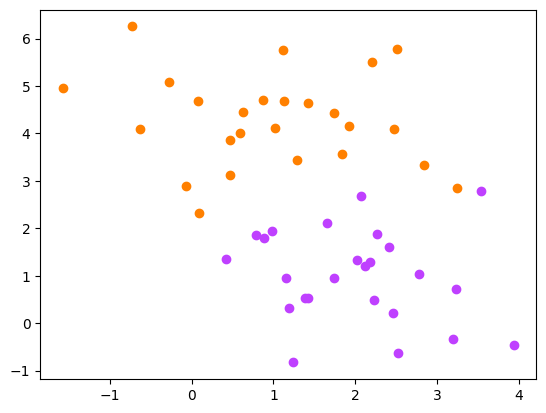

In [77]:
plot(data, labels, k)

In [78]:
import numpy as np

clusters = np.zeros(N)

In [79]:
import random
i1 = random.randint(1, N)
i2 = random.randint(1, N)

xc1, yc1 = data[i1][0], data[i1][1]
xc2, yc2 = data[i2][0], data[i2][1]

In [80]:
def plot_c(data, labels, xc1, yc1, xc2, yc2):
  x1 = data[labels==0, 0]
  y1 = data[labels==0, 1]
  x2 = data[labels==1, 0]
  y2 = data[labels==1, 1]
  plt.scatter(x1, y1, color='lightcoral')
  plt.scatter(x2, y2, color='lime')
  plt.scatter(xc1, yc1, color='red')
  plt.scatter(xc2, yc2, color='green')

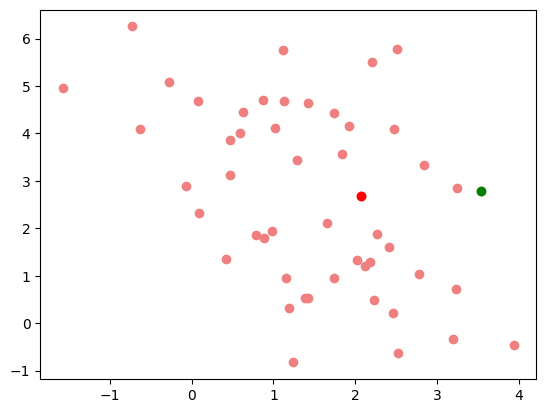

In [81]:
plot_c(data, clusters, xc1, yc1, xc2, yc2)

In [91]:
import math
def dist(x1, y1, x2, y2):
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [89]:
def new_clusters(data, clusters, centers):
  k = len(centers)
  for i in range(len(data)):
    p = data[i]
    d = [dist(p[0], p[1], centers[j][0], centers[j][1]) for j in range(k)]
    mn = min(d)
    i_mn = d.index(mn)
    clusters[i] = i_mn
  return clusters

In [87]:
def update_c(data, clusters):
  X = [data[clusters==i, 0] for i in range(k)]
  Y = [data[clusters==i, 1] for i in range(k)]

  Xc = [np.average(X[i]) for i in range(k)]
  Yc = [np.average(Y[i]) for i in range(k)]

  centers = [[Xc[i], Yc[i]] for i in range(k)]
  return centers

In [85]:
def clusterization(data, max_iter_count, k):
  N = len(data)
  clusters = np.zeros(N)
  #First step: Random centers choose
  num = [random.randint(1, N - 1) for i in range(k)]
  centers = [[[data[num[i]][0]], [data[num[i]][1]]] for i in range(k)]
  #Second step: Iterating update
  for i in range(max_iter_count):
    #Step two-one: New clusters identification
    clusters = new_clusters(data, clusters, centers)
    #Step two-two: New centers created
    centers = update_c(data, clusters)
  return clusters

<ipython-input-91-e8c90de7a78a>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


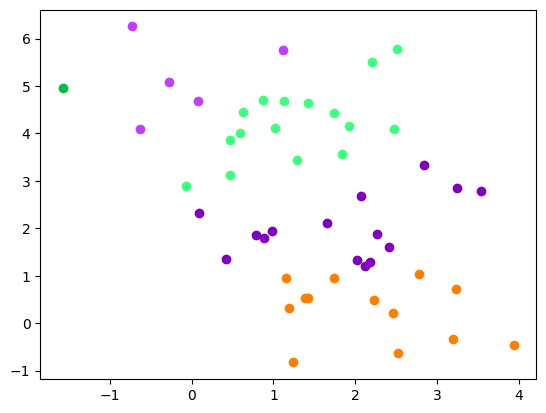

In [93]:
result = clusterization(data, 50, k)
plot(data, result, k)